In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [3]:
# train for 3 date class: break/class/final

activity_sleep_survey = pd.read_csv('../../../merged_data/activity_sleep_daily_date_class_2015.csv')
activity_sleep_survey.drop(['timetobed', 'timeoutofbed'], axis=1, inplace=True)
activity_sleep_survey.dropna(inplace=True)

In [5]:
train_data = pd.get_dummies(activity_sleep_survey.dropna().drop(['egoid', 'dataDate'], axis=1))

clf1 = RandomForestClassifier(random_state=33, oob_score=True)
clf1.fit(train_data, activity_sleep_survey['dataDate'])

RandomForestClassifier(oob_score=True, random_state=33)

In [6]:
feature_imp = pd.Series(clf1.feature_importances_, index = train_data.columns).sort_values(ascending = False)
feature_imp

steps                   0.158503
lightlyactiveminutes    0.075563
veryactiveminutes       0.064706
sedentaryminutes        0.062412
fairlyactiveminutes     0.059132
fatburncal              0.053465
bedtimedur              0.049077
minsasleep              0.045499
sdrate                  0.044998
lowrangecal             0.044847
floors                  0.043963
meanrate                0.042340
fatburnmins             0.040749
lowrangemins            0.038759
efficiency              0.036417
minsawake               0.031357
complypercent           0.025715
minstofallasleep        0.022304
cardiocal               0.019650
cardiomins              0.014998
minsafterwakeup         0.013848
peakcal                 0.006441
peakmins                0.005255
dtype: float64

In [7]:
train_features, test_features, train_labels, test_labels = train_test_split(train_data, activity_sleep_survey['dataDate'], test_size = 0.25, random_state = 42)

clf2 = RandomForestClassifier(random_state=33, oob_score=True)
clf2.fit(train_features, train_labels)

print(classification_report(test_labels, clf2.predict(test_features)))

              precision    recall  f1-score   support

           b       0.75      0.60      0.67      2748
           c       0.83      0.94      0.88      7214
           f       0.00      0.00      0.00       387

    accuracy                           0.81     10349
   macro avg       0.53      0.51      0.51     10349
weighted avg       0.78      0.81      0.79     10349



c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
clf2.oob_score_

0.8022997391052276

In [10]:
# train for 5 date class: summer break / fall class / fall break / fall final / winter break

activity_sleep_survey = pd.read_csv('../../final_data/activity_sleep_survey_date_extended_class_2015_1.csv')
activity_sleep_survey.drop(['timetobed', 'timeoutofbed'], axis=1, inplace=True)
activity_sleep_survey.dropna(inplace=True)

train_data = pd.get_dummies(activity_sleep_survey.dropna().drop(['egoid', 'dataDate'], axis=1))
cols = train_data.columns

train_features, test_features, train_labels, test_labels = train_test_split(train_data, activity_sleep_survey['dataDate'], test_size = 0.25, random_state = 42)
clf3 = RandomForestClassifier(random_state=33, oob_score=True)
clf3.fit(train_features, train_labels)


print(classification_report(test_labels, clf3.predict(test_features)))

              precision    recall  f1-score   support

  fall_break       0.35      0.09      0.15       931
  fall_class       0.77      0.99      0.86      7214
  fall_final       0.00      0.00      0.00       387
summer_break       0.64      0.24      0.35      1015
winter_break       0.57      0.32      0.41       802

    accuracy                           0.74     10349
   macro avg       0.47      0.33      0.35     10349
weighted avg       0.67      0.74      0.68     10349



In [15]:
# 2015 without survey. Try without survey data to examine differences
activity_sleep = pd.read_csv('../../merged_data/activity_sleep_daily_date_extended_class_2015.csv')
activity_sleep.drop(['timetobed', 'timeoutofbed'], axis=1, inplace=True)
activity_sleep.dropna(inplace=True)

train_data = pd.get_dummies(activity_sleep.dropna().drop(['egoid', 'dataDate'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, activity_sleep['dataDate'], test_size = 0.25, random_state = 42)

clf = RandomForestClassifier(random_state=33, oob_score=True)
clf.fit(train_features, train_labels)
print(classification_report(test_labels, clf.predict(test_features)))

              precision    recall  f1-score   support

  fall_break       0.28      0.10      0.14       931
  fall_class       0.78      0.98      0.87      7214
  fall_final       0.00      0.00      0.00       387
summer_break       0.42      0.19      0.26      1015
winter_break       0.45      0.31      0.37       802

    accuracy                           0.73     10349
   macro avg       0.39      0.31      0.33     10349
weighted avg       0.65      0.73      0.67     10349



c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


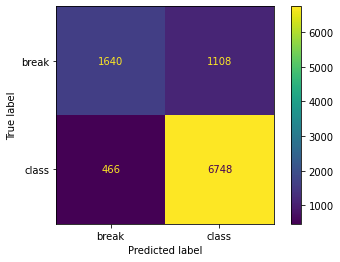

In [8]:
def apply_conversion(x):
    if x == 'b':
        return 'break'
    elif x == 'c':
        return 'class'
    elif x == 'f':
        return 'final'

# train for 3 date class: break/class/final

activity_sleep_survey = pd.read_csv('../../../merged_data/activity_sleep_daily_date_class_2015.csv')
activity_sleep_survey.drop(['timetobed', 'timeoutofbed'], axis=1, inplace=True)
activity_sleep_survey.dropna(inplace=True)

train_data = pd.get_dummies(activity_sleep_survey.dropna().drop(['egoid', 'dataDate'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, activity_sleep_survey['dataDate'].apply(apply_conversion), test_size = 0.25, random_state = 42)

clf = RandomForestClassifier(random_state=33, oob_score=True)
clf.fit(train_features, train_labels)

ConfusionMatrixDisplay.from_predictions(test_labels, clf.predict(test_features), labels=['break', 'class'])
plt.show()